In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [27]:
def plot(x,y,title,x_lable,y_lable,FileName):
    #plt.figure(figsize=(8,6))
    plt.plot(x,y)#,linewidth=4)
    plt.title( title, fontsize=14 )
    plt.xlabel( x_lable, fontsize=14 )
    plt.ylabel( y_lable, fontsize=14 )
    plt.tick_params(axis='both',which='major',labelsize=14)
    plt.grid(visible=True)
    if( FileName is not None ):
        plt.savefig(FileName,dpi=600)
    #plt.show()


    10
-----------
s^2 + 0.3 s



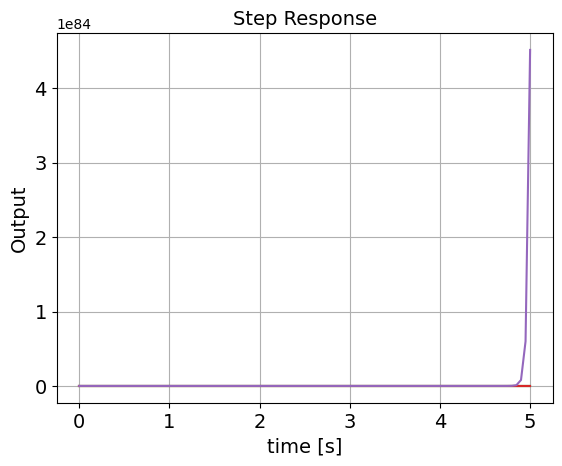

In [42]:
def step( H, name=None ):
    #H=ct.tf(num,den)
    #print(H)
    
    # simulate the step response
    timeVector = np.linspace(0,5,100)
    timeReturned, systemOutput = ct.step_response(H,timeVector)
    
    # plot the step response
    plot(timeReturned,systemOutput,'Step Response','time [s]','Output',name)

k = 10
a = 0.3
H=ct.tf([k],[1,0])*ct.tf([1],[1,a])
print(H)
for i in range(5):
    H=ct.tf([k],[1,0])*ct.tf([1],[1,-i*10])
    step(H)

In [51]:
import sympy as sp

sp.init_printing()
t = sp.symbols('t',real=True)
s = sp.symbols('s')
b = sp.symbols('b',real=True,positive=True)

f1 = sp.exp( -b*t )
print(f1)

L = sp.laplace_transform(f1,t,s,noconds=True)
print(L)

exp(-b*t)
1/(b + s)


1/(s + 2)
1/(s + 2)
exp(-2*t)*Heaviside(t)


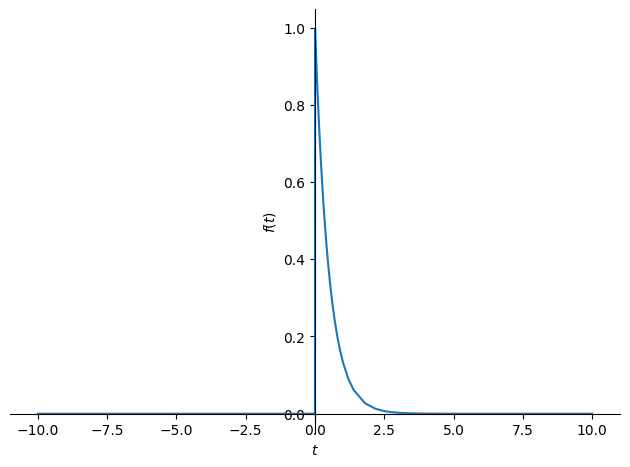

In [87]:
L = 1/(s+2)

print( L.apart(s) )

print(L)

f = sp.inverse_laplace_transform(L,s,t)
print(f)

sp.plot(f)

In [65]:
# Bot
vel = sp.symbols('vel',real=True)
r = sp.symbols('r',real=True,positive=True) # raio da roda
CMx = sp.symbols('CMx',real=True,positive=True) # centro de massa x
CMy = sp.symbols('CMy',real=True,positive=True) # centro de massa y

# ma*CMy + w*Nb = mg*CMx
# Nb = m( g*CMx - a*CMy )/w
# Nb = m( g*CMx - a*CMy )/w
# Nb = (m/w)(g*CMx) - (m/w)*CMy*a


# Na + Nb = mg
# Na = mg - Nb

# F = ma + Nb*u
# F = ma + u*(m/w)(g*CMx) - u*(m/w)*CMy*a
# F = (umg*CMx/w)+ m*(1-(u*CMy/w))*a
# tau = r*F = r*(umg*CMx/w) + rm*(1-(u*CMy/w))*a
#
# kt = k
# I = tau/kt + In = In + r*(umg*CMx/(k*w)) + rm*(1-(u*CMy/(k*w)))*a
# I(a) = [In + r*(umg*CMx/(kt*w))] + [rm*(1-(u/k)*(CMy/w)))]*a

# V = R*I + Vind
# V = R*I + W*k
# V = R*I + (k/r)*vel

# V = R*I + (k/r)*vel
# V = R*I + (k/r)*int(a)
# int(a) = (r/k)V - (r/k)R*I(a)

# V = R*{ [In + r*(umg*CMx/(kt*w))] + [rm*(1-(u/k)*(CMy/w)))]*vel' } + (k/r)*vel
# V = [R*In + R*r*(umg*CMx/(kt*w))] + [R*rm*(1-(u/k)*(CMy/w)))]*vel' + (k/r)*vel

# V(S) = [R*In + R*r*(umg*CMx/(kt*w))] + [R*rm*(1-(u/k)*(CMy/w)))]*S*VEL + (k/r)*VEL

# V(S) = [R*In + R*r*(umg*CMx/(kt*w))] + [R*rm*(1-(u/k)*(CMy/w)))*S + (k/r)]*VEL
# V(S) = [R*In + R*r*(umg*CMx/(kt*w))] + [R*rm*(1-(u/k)*(CMy/w)))*S + (k/r)]*VEL

# [R*rm*(1-(u/k)*(CMy/w)))*S + (k/r)]*VEL = V(S) - [R*In + R*r*(umg*CMx/(kt*w))]

# VEL = V(S)/[R*rm*(1-(u/k)*(CMy/w)))*S + (k/r)] - [R*In + R*r*(umg*CMx/(kt*w))]/[R*rm*(1-(u/k)*(CMy/w)))*S + (k/r)]

# H = 1/[R*rm*(1-(u/k)*(CMy/w)))*S + (k/r)]

# H = 1/(A*S + B) = (1/A)/( s + (B/A) )

# mult = 1/(R*rm*(1-(u/k)*(CMy/w)))
# a = (k/r)/(R*rm*(1-(u/k)*(CMy/w)))
# a = k/(R*r²m*(1-(u/k)*(CMy/w)))


# int(a) = (r/k)V - (r/k)R*I(a)
# int(a) = (r/k)V - (r/k)R*{[In + r*(umg*CMx/(kt*w))] + [rm*(1-(u*CMy/(kt*w)))]*a}
# int(a) = [ (r/k)V - (r/k)R*In - (r/k)R*r*(umg*CMx/(kt*w)) ] - [(r/k)R*rm*(1-(u*CMy/(kt*w)))]*a
# int(a) = [ (r/k)V - (r/k)R*In - (r/k)R*r*(umg*CMx/(kt*w)) ] - [(r/k)R*rm*(1-(u*CMy/(kt*w)))]*a

# VEL = [ (r/k)V - (r/k)R*In - (r/k)R*r*(umg*CMx/(kt*w)) ] - [(r/k)R*rm*(1-(u*CMy/(kt*w)))]*s*(VEL)

# VEL ( 1 + [(r/k)R*rm*(1-(u*CMy/(kt*w)))]*s ) = [ (r/k)V - (r/k)R*In - (r/k)R*r*(umg*CMx/(kt*w)) ]




# Motor
k = sp.symbols('k',real=True,positive=True) # constante do motor v/(rad/s)
R = sp.symbols('R',real=True,positive=True) # resistencia

w = vel*r
Vind = w*k

print(w)
print(Vind)

r*vel
k*r*vel


1/(0.133517687777566*s + 6.74067994271557)
tempo: 0.09903873860815364 s
7.48964438079508*exp(-50.4852956556977*t)*Heaviside(t)


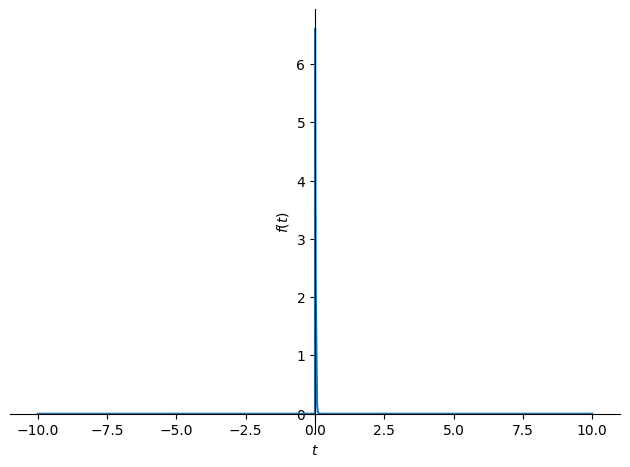

In [115]:
# VEL ( 1 + [(r/k)R*rm*(1-(u*CMy/(kt*w)))]*s ) = [ (r/k)V - (r/k)R*In - (r/k)R*r*(umg*CMx/(kt*w)) ]


k = 6/(np.pi*500/30) # v/(rad/s)
R = 3 # V/A
r = 17e-3 # metro
m = 300e-3; # massa

# tempo = Rr²m/k²
# tempo = ohm*m²kg/(v²s²)
# tempo = ((m²/s)kg)/(Ws)
# tempo = (N/s)/W
# tempo = (N/s)/(Nm/s) = 1/m
# [H] = (m/s)/V
# [H] = (m/sV) -> 

H = 1/( (R*r*m/k)*s + (k/r) )
print(H)

print( 'tempo:', 5*(R*r*r*m)/(k*k) ,'s' )

f = sp.inverse_laplace_transform(H,s,t)
print(f)

sp.plot( f )

In [95]:
print(0.0180794219443915/6.74067994271557)
print(1/6.74067994271557)

0.0026821362381890474
0.14835298641951797
